### imports

In [1]:
import pandas as pd
from transformers import ViTImageProcessor, ViTModel, ViTImageProcessorFast
import chromadb
from chromadb import Documents, EmbeddingFunction, Embeddings
from chromadb.utils.data_loaders import ImageLoader
from IPython.display import Image

/Users/shogun/.pyenv/versions/3.10.6/envs/inspiart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Workbook to demonstrate querying a ChromaDB

## †he custom embedding class

In [2]:
class GoogleVITHuge224Embedding(EmbeddingFunction):

    '''
    A class to provide custom embeddings to a ChromaDB database
    embedding images using the Google vit-huge-patch14-224-in21k
    the class returns an embedding as a numpy array
    '''


    def __call__(self, input: Documents) -> Embeddings:

        #Instantiate the image. Convert it to 244 x 244 and normalise RGB between 0 and 1 witha mean of 0.5 for each channel

        self.feature_extractor = ViTImageProcessorFast.from_pretrained('google/vit-huge-patch14-224-in21k')

        #Instantiate the Google ViT with pretrained weights

        self.model = ViTModel.from_pretrained('google/vit-huge-patch14-224-in21k')#Preprocess the data

        inputs = self.feature_extractor(images=input, return_tensors="pt")

        #Embedd the data

        outputs = self.model(**inputs)

        #Convert the embedding to a Numpy array and take the first vector of the Transformer state

        embeddings = outputs.last_hidden_state.data.numpy()[0,0]

        #return the embedding

        return embeddings

## ßetting up and performing the query

In [3]:
#instantiate the image loader that ChromaDB uses to load pictures

image_loader = ImageLoader()

#intantiate the custom embedding function

image_embbeding_function = GoogleVITHuge224Embedding()

#connect to the database

chroma_client = chromadb.PersistentClient(path='/Users/shogun/code/gwen-m97/inspiart/models/google_vit_sample1000_db')

#connect to the correct collection

images_db = chroma_client.get_or_create_collection(name="google_vit_sample1000_collection", embedding_function=image_embbeding_function, data_loader=image_loader)

#test picture string

#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Two_Young_Girls_at_the_Piano_MET_rl1975.1.201.R.jpg'
#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Piet_Mondriaan,_1942_-_New_York_City_I.jpg'
#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Paul_Cézanne_-_The_Basket_of_Apples_-_1926.252_-_Art_Institute_of_Chicago.jpg'
query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'

#perform the query

image_suggestions = images_db.query(
    query_uris=[query_uris], include=['uris','metadatas']
)


/var/folders/1r/626773hx3mbf2w_31tdjwv6m0000gn/T/ipykernel_73419/3965156912.py:7: DeprecationWarning: The class GoogleVITHuge224Embedding does not implement __init__. This will be required in a future version.
  image_embbeding_function = GoogleVITHuge224Embedding()
Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 9258.95it/s]


In [4]:
image_suggestions

{'ids': [['211429-autumn-1955.jpg',
   '157481-le-paradis-des-antilopes-1994.jpg',
   '162070-untitled-1959.jpg',
   '108817-mere-et-son-enfant1.jpg',
   '127260-signs-of-life-1981.jpg',
   '127158-stained-glass-window-1963.jpg',
   '83277-from-thuringewald-1905.jpg',
   '93479-the-manneport-reflections-of-water.jpg',
   '89684-clouds.jpg',
   '163102-edrita-fried-1981.jpg']],
 'embeddings': None,
 'documents': None,
 'uris': [['/Users/shogun/code/gwen-m97/raw_data/sample1000/211429-autumn-1955.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/157481-le-paradis-des-antilopes-1994.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/162070-untitled-1959.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/108817-mere-et-son-enfant1.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/127260-signs-of-life-1981.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/127158-stained-glass-window-1963.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/83277-fr

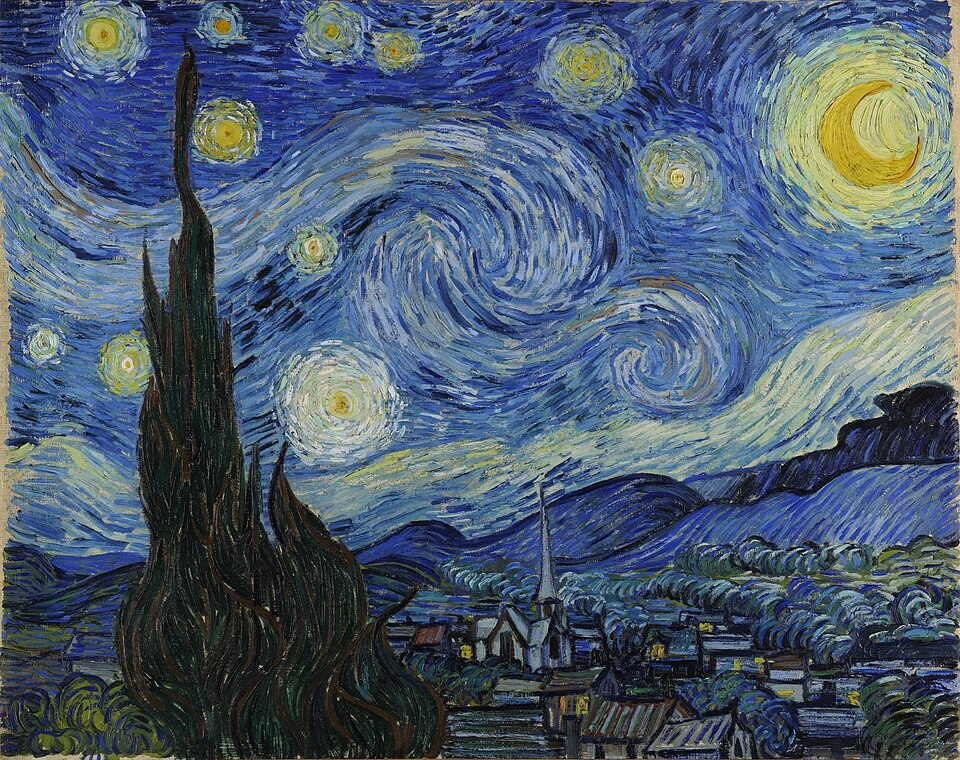

In [5]:
Image('/Users/shogun/code/gwen-m97/raw_data/test_images/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

In [6]:
Image(url=f"{image_suggestions['metadatas'][0][0]['img']}")

In [7]:
Image(url=f"{image_suggestions['metadatas'][0][1]['img']}")

In [8]:
Image(url=f"{image_suggestions['metadatas'][0][2]['img']}")

In [9]:
Image(url=f"{image_suggestions['metadatas'][0][3]['img']}")

In [10]:
Image(url=f"{image_suggestions['metadatas'][0][4]['img']}")

In [11]:
Image(url=f"{image_suggestions['metadatas'][0][5]['img']}")

In [12]:
Image(url=f"{image_suggestions['metadatas'][0][6]['img']}")

In [13]:
Image(url=f"{image_suggestions['metadatas'][0][7]['img']}")

In [14]:
Image(url=f"{image_suggestions['metadatas'][0][8]['img']}")

In [15]:
Image(url=f"{image_suggestions['metadatas'][0][9]['img']}")